In [2]:
%pylab inline
import pyensae
import pandas, urllib.request
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import preprocessing
from sklearn import neural_network
from sklearn import linear_model
from sklearn import ensemble
from sklearn import metrics
from sklearn import neighbors
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from pydoc import help
from scipy.stats.stats import pearsonr, spearmanr
from random import randrange

Populating the interactive namespace from numpy and matplotlib


In [3]:
t3=time.clock()

## Importacion de la base

In [4]:
#Importamos la base completa
base_c=r'/Users/gillescornec/Desktop/Bases_QV/base_complete.csv'
df_base_c = pandas.read_csv(base_c, sep=';')
df_base=df_base_c.set_index("destination")
df_base.head()

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Client,from address,from domain,destination user,has only words,has special chars,destination domain,attachments,has attachments,...,status_name,created,bounce detail,num_dominio,num_client,num_words,num_chars,attach,num_from,bounce
destination,,,,,,,,,,,,,,,,,,,,,
jobediente@gfaralon.com,0,BAC,credomatic-informa@pa.credomatic.com,pa.credomatic.com,jobediente,Y,N,gfaralon.com,NaN,N,...,Invalid domain,08/07/2016 0:00,NaN,2149,0,1,0,0,5,1
luisanaisa@hotmail.com,1,BAC,credomatic-informa@pa.credomatic.com,pa.credomatic.com,luisanaisa,Y,N,hotmail.com,NaN,N,...,Delivered,08/06/2016 23:59,NaN,2662,0,1,0,0,5,0
cmonte30@hotmail.com,2,BAC,credomatic-informa@pa.credomatic.com,pa.credomatic.com,cmonte30,N,N,hotmail.com,NaN,N,...,Viewed,08/06/2016 23:59,NaN,2662,0,0,0,0,5,0
roderick@mcgowensa.com,3,BAC,credomatic-informa@pa.credomatic.com,pa.credomatic.com,roderick,Y,N,mcgowensa.com,NaN,N,...,Viewed,08/06/2016 23:59,NaN,3457,0,1,0,0,5,0
manuelguevara@gmail.com,4,BAC,credomatic-informa@pa.credomatic.com,pa.credomatic.com,manuelguevara,Y,N,gmail.com,NaN,N,...,Delivered,08/06/2016 23:59,NaN,2209,0,1,0,0,5,0


In [5]:
df_base.columns

Index(['Unnamed: 0', 'Client', 'from address', 'from domain',
       'destination user', 'has only words', 'has special chars',
       'destination domain', 'attachments', 'has attachments', 'status_id',
       'status_name', 'created', 'bounce detail', 'num_dominio', 'num_client',
       'num_words', 'num_chars', 'attach', 'num_from', 'bounce'],
      dtype='object')

In [6]:
#base de 21 variables y de 121903 observaciones.
shape(df_base)

(121903, 21)

## Estudio de las correlaciones

In [7]:
#Debemos vectorizar las variables y normalizarles antes de hacer test de correlacion.

In [8]:
def lista_mod(columna):
    l=[]
    for i in columna:
        if i not in l:
            l.append(i)
    return l

In [9]:
#trata las columnas numericas y otras
def vectorisation_all(df_columna,lista_mod):

    if type(df_columna[0])!=numpy.int64:

        dico={}
        for i in range(len(lista_mod)):
            dico[lista_mod[i]]=i
    
        num_dom=[]
        for i in df_columna:
            num_dom.append(dico[i])
            
    else:
        dico={}
        for i in lista_mod:
            dico[i]=i
        
        num_dom=[]
        for i in df_columna:
            num_dom.append(dico[i])
        
    
    return(num_dom, dico)

In [10]:
def df_vectorisé(base,liste_variable):
    
    #var_name=["destination domain","Client","from domain","has attachments", "has only words", "has special chars"]
    l_vect=[]
    var_dic=[]
    
    for i in liste_variable:
        l_vect.append(pandas.DataFrame(vectorisation_all(base[i],lista_mod(base[i]))[0],columns=[i]))
        var_dic.append(vectorisation_all(base[i],lista_mod(base[i]))[1])
    #df_vect=pandas.concat(l_vect, axis=1)
    
    return (pandas.concat(l_vect, axis=1), var_dic)


In [11]:
t1=time.clock()
var_name=["destination domain","Client","from domain","has attachments", "has only words", "has special chars"]
df_vect=df_vectorisé(df_base,var_name)[0]
t2=time.clock()
print(t2-t1)
df_vect.head()    

2.8822


,destination domain,Client,from domain,has attachments,has only words,has special chars
0,0,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,1,0
3,2,0,0,0,0,0
4,3,0,0,0,0,0


In [12]:
df_vectorisé(df_base,var_name)[1][3]

{'N': 0, 'Y': 1}

In [13]:
#solo funciona con dataframes.
def correlacion_inputs_target(inputs,target):
    t=pandas.DataFrame([{"Input":1 ,"Target":2,"correlation":4,"p_value":5 }])
    l=[]
    l.append(t)
    for i in range(len(inputs.columns)):
        a=l[i].append([{"Input":inputs.columns[i] ,"Target":'Target' ,"correlation":spearmanr(inputs[inputs.columns[i]],target)[0],"p_value":spearmanr(inputs[inputs.columns[i]],target)[1]}])
        l.append(a)
    
    b=l[i+1].set_index("Target")
    c=b.drop([2])
    return c

In [14]:
correlacion_inputs_target(df_vect,df_base["bounce"])

,Input,correlation,p_value
Target,,,
Target,destination domain,0.061045,5.576851e-101
Target,Client,0.429016,0.000000e+00
Target,from domain,0.423837,0.000000e+00
Target,has attachments,-0.022557,3.362405e-15
Target,has only words,-0.048308,6.736180e-64
Target,has special chars,-0.011214,9.023224e-05


In [15]:
#correlacion entre los diff inputs.
def correlacion_inputs(inputs):
    t=pandas.DataFrame([{"Input 1":1 ,"Input 2":2,"correlation":4,"p_value":5 }])
    l=[]
    p=0
    l.append(t)
    for i in range(len(inputs.columns)):
        for j in range(i+1,len(inputs.columns)):
            #print(i)
            #print(j)
            a=l[p].append([{"Input 1":inputs.columns[i] ,"Input 2": inputs.columns[j],"correlation":spearmanr(inputs[inputs.columns[i]],inputs[inputs.columns[j]])[0],"p_value":spearmanr(inputs[inputs.columns[i]],inputs[inputs.columns[j]])[1]}])
            l.append(a)
            #print(spearmanr(base_inputs[base_inputs.columns[i]],base_inputs[base_inputs.columns[j]]))
            #print(l[p])
            p=p+1
            #print(p)
            
    b=l[p].set_index("Input 1")
    c=b.drop([1])

    return c

In [16]:
correlacion_inputs(df_vect)

,Input 2,correlation,p_value
Input 1,,,
destination domain,Client,0.004777,9.534089e-02
destination domain,from domain,0.007600,7.966114e-03
destination domain,has attachments,0.225311,0.000000e+00
destination domain,has only words,-0.280431,0.000000e+00
destination domain,has special chars,-0.056999,2.892645e-88
Client,from domain,0.982523,0.000000e+00
Client,has attachments,0.012844,7.306285e-06
Client,has only words,-0.033039,8.430172e-31
Client,has special chars,-0.018727,6.197416e-11


### Estudio de los clientes: quienes son los que generan lo mas bounces?

In [17]:
#transformamos el df en array para calcular mas facilmente.
np_bounce_all=df_base["bounce"].as_matrix()
np_client_all=df_base["Client"].as_matrix()

In [18]:
lista_mod(np_client_all)

['BAC', 'Banesco', 'Mapfre', 'Ricardo Perez']

In [19]:
def enumeration(columna,lista_modalidades):

    dico={}
    for i in range(len(lista_modalidades)):
        dico[lista_modalidades[i]]=0
        
    for i in lista_modalidades:
        #print(i)
        for j in columna:
            #print(j)
            if i==j:
                dico[i]=dico[i]+1
    
    return(dico)

In [20]:
def bounce_por_client(df_base):
    
    BDCC=[]
    
    np_client_all=df_base["Client"].as_matrix()
    
    df_bounce=df_base[df_base["bounce"]==1]
    np_client_bounce=df_bounce["Client"].as_matrix()
    
    dic_client_all=enumeration(np_client_all,lista_mod(np_client_all))
    dic_client_bounce=enumeration(np_client_bounce,lista_mod(np_client_bounce))
    
    #print(dic_client_all)
    #print(dic_client_bounce)
    
    for i in lista_mod(np_client_bounce):
        BDCC.append(dic_client_bounce[i]/dic_client_all[i])
        
    return(BDCC)

In [21]:
bounce_por_client(df_base)

[0.09660092993426327,
 0.20051004144086707,
 0.29273076923076924,
 0.609215203122615]

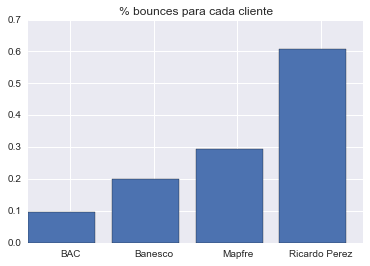

In [22]:
plt.bar([0.5+i for i in range(len(bounce_por_client(df_base)))],bounce_por_client(df_base))
plt.xticks([1+i for i in range(len(bounce_por_client(df_base)))], lista_mod(np_client_all))
plt.title("% bounces para cada cliente")

In [23]:
np_dominio=df_base["destination domain"].as_matrix()
np_dominio

array(['gfaralon.com', 'hotmail.com', 'hotmail.com', ..., 'hotmail.com',
       'hotmail.com', 'hotmail.com'], dtype=object)

In [24]:
#Mejor: identificar los destinatario dominio que generan lo mas bounce (/frecuencia de aparencia de estos dominio)

###  Estudio de los dominios: cuales son los que generan los mas bounce?

In [25]:
#Puede ser generalizado en bounce por modalidades de algun variable precisando la variable
def bounce_por_dominios(df_base):
    
    BDCD={}
    l=[]
    np_dom_all=df_base["destination domain"].as_matrix()
    
    df_bounce=df_base[df_base["bounce"]==1]
    np_dom_bounce=df_bounce["destination domain"].as_matrix()
    
    dic_dom_all=enumeration(np_dom_all,lista_mod(np_dom_all))
    dic_dom_bounce=enumeration(np_dom_bounce,lista_mod(np_dom_bounce))
    
    #print(dic_client_all)
    #print(dic_client_bounce)
    
    for i in lista_mod(np_dom_bounce):
        #no queremos los email adress sola 
        if dic_dom_bounce[i]/dic_dom_all[i] <1 or dic_dom_all[i]>1:
            l.append(i)
            BDCD[i]=dic_dom_bounce[i]/dic_dom_all[i]
            
        
    return(BDCD,l,dic_dom_bounce)

In [26]:
#Hacer una funcion para identificar los 10 dominios con un tassa de bounce abajo de 0.95 que
#generan lo mas bounces.

In [27]:
#1min
t1=time.clock()
BPD=bounce_por_dominios(df_base)
t2=time.clock()
print(t2-t1)


66.96131


In [28]:
#salir los max y hacer un dictionario con el numero de bounce y el numbre del dominio

In [29]:
#retorna los dominios bounced por mas de 0.95 y la lista del numero de bounces que generan
def listas_95(dic_bounce, lista_bounce, dic_dom_bounce):

    l_1=[]
    for i in lista_bounce:
        if dic_bounce[i]>= 0.95:
            l_1.append(i)
            
    l_2=[]
    for i in l_1:
        #print(dic_dom_bounce[i])
        l_2.append(dic_dom_bounce[i])
        
    return(l_1, l_2)

def dom_mas_bounce(lista_num):
    
    l_index=[]
    l_2=lista_num
    for i in range(10):
        m=max(l_2)
        print(m)
        #print(listas_95(dic_dom_bounce)[1].index(m))
        #print(listas_95(dic_dom_bounce)[0][listas_95(dic_dom_bounce)[1].index(m)])
        l_index.append(listas_95(BPD[0],BPD[1],BPD[2])[0][listas_95(BPD[0],BPD[1],BPD[2])[1].index(m)])
        l_2.remove(m)
    
    return l_index


In [30]:
dom_mas_bounce(listas_95(BPD[0],BPD[1],BPD[2])[1])

233
183
149
101
73
70
70
64
57
55


['gamil.com',
 'banconal.com.pa',
 'cwp.net.pa',
 'segurosg.com',
 'seguroscentralizados.com.pa',
 'sinfo.net',
 'sinfo.net',
 'mail.com',
 'hsbc.com.pa',
 'latinmail.com']

## Reduccion de las variables: ACP

In [31]:
#Hacemos la PCA con la base vectorizada

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
print(pca.fit(df_vect))



PCA(copy=True, n_components=4, whiten=False)


In [33]:
pca.explained_variance_ratio_

array([  9.99993018e-01,   6.36712604e-06,   3.33999501e-07,
         1.52867954e-07])

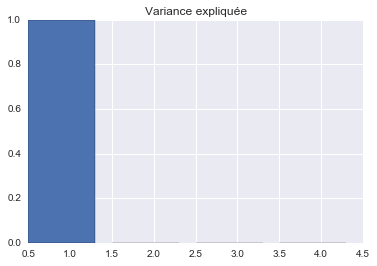

In [34]:
plt.bar(numpy.arange(len(pca.explained_variance_ratio_))+0.5, pca.explained_variance_ratio_)
plt.title("Variance expliquée")

In [35]:
#Necesitamos de normalizar la base para que la PCA sea mas justa. Pero no se si deberia hacerla
#solo con las variables explicativas o tambien con la variable que debemos explicar

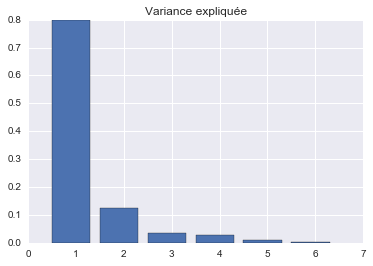

In [36]:
from sklearn.preprocessing import normalize
xnorm = normalize(df_vect)
pca = PCA(n_components=6)
pca.fit(xnorm)
plt.bar(numpy.arange(len(pca.explained_variance_ratio_))+0.5, pca.explained_variance_ratio_)
plt.title("Variance expliquée")

In [37]:
#1min17s
t4=time.clock()
print(t4-t3)

76.88032600000001
